<a href="https://colab.research.google.com/github/nachovera93/IA-Documents/blob/main/IntroPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introducción a PyTorch**

PyTorch es una libreria para programas de python que facilita los proyectos de Deep Learning. PyTorch nos da un tipo de datos, el **Tensor** que son arrays multidimensionales para contener números, vectores, matrices, o matrices en general. Además, proporciona funciones para operar sobre ellos. Se puede
programar con ellos de forma incremental y, si queremos, interactivamente, muy parecido a Numpy.
<br>

En segundo lugar, PyTorch proporciona instalaciones que admiten la optimización numérica en
Expresiones matemáticas genéricas, que el aprendizaje profundo utiliza para el entrenamiento. 
<br>

PyTorch
ha sido equipado con un tiempo de ejecución C ++ de alto rendimiento que se puede utilizar para implementar
modelos para inferencia sin depender de Python, y se puede utilizar para diseñar y
entrenar modelos en C ++. También ha crecido vínculos con otros idiomas y una interface para implementar en dispositivos móviles. Estas características permiten aprovechar
la flexibilidad de PyTorch y al mismo tiempo llevar nuestras aplicaciones donde un script de Python completo
 sería difícil de conseguir.

<br>


En el momento de la primera versión beta de PyTorch:
* Theano y TensorFlow fueron las principales bibliotecas de bajo nivel, trabajando con un
modelo que hizo que el usuario definiera un gráfico computacional y luego lo ejecutara.
* Lasagne y Keras fueron envoltorios de alto nivel alrededor de Theano, con envoltura de Keras a TensorFlow y CNTK también.
* Caffe, Chainer, DyNet, Torch (el precursor de PyTorch basado en Lua), MXNet,
CNTK, DL4J y otros llenaron varios nichos en el ecosistema.
<br>

En los aproximadamente dos años que siguieron, el panorama cambió drásticamente. La comunidad consolidada en gran medida detrás de PyTorch o TensorFlow, con la adopción
de otras bibliotecas menguando, excepto aquellas que llenan nichos específicos. En una palabra:
* Theano, uno de los primeros marcos de aprendizaje profundo, ha dejado de desarrollarse activamente.
* TensorFlow:
>Consumío Keras por completo, promoviéndolo a una API de primera clase
<br>
> Proporcionó un "modo inmediato (eager)" de ejecución que es algo similar a cómo PyTorch aborda la computación.
<br>


* JAX, una biblioteca de Google que se desarrolló independientemente de TensorFlow,
ha comenzado a ganar tracción como un equivalente de NumPy con GPU, autograd y Capacidades JIT.

> PyTorch:
- Consumío Caffe2 para su backend
- Reemplazó la mayor parte del código de bajo nivel reutilizado del proyecto Torch basado en Lua
- Se agregó soporte para ONNX, una descripción del modelo independiente del proveedor y formato de intercambio
- Se agregó un tiempo de ejecución de "modo gráfico" de ejecución retardada llamado *TorchScript*
- Versión 1.0 publicada
- Reemplazó CNTK y Chainer como el marco de elección por sus respectivos
patrocinadores corporativos.
<br>

TensorFlow tiene una sólida canalización de producción, una extensa comunidad de
nidad y mentes compartidas masivas. PyTorch ha hecho grandes avances con la investigación y
comunidades de enseñanza, gracias a su facilidad de uso, y ha cobrado impulso desde que investigadores y graduados capacitan a estudiantes y se trasladan a la industria. También se ha construido en términos de soluciones de producción. Curiosamente, con la llegada de TorchScript
y modo "eager", tanto PyTorch como TensorFlow han visto cómo sus conjuntos de funciones comienzan a
convergen con los demás, aunque la presentación de estas características y la experiencia sigue siendo bastante diferente entre los dos.

<br>

###**Que necesita un proyecto de Deep Learning por PyTorch**

Primero, PyTorch tiene el "Py" como en Python, pero hay mucho código que no es Python. En realidad, por razones de rendimiento, la mayor parte de PyTorch está escrito en C ++ y CUDA, un lenguaje similar a C ++ de NVIDIA que se puede compilar para ejecutarse con un paralelismo masivo en las GPU. Hay formas de correr PyTorch directamente desde C ++.


Teniendo tensores y la biblioteca estándar de tensor habilitada para autogrado, PyTorch puede utilizarse para física, renderizado, optimización, simulación, modelado y más. Pero PyTorch es ante todo una biblioteca de aprendizaje profundo y proporciona todos los componentes básicos necesarios para construir redes neuronales y entrenarlas. La siguiente figura muestra una configuración estándar que carga datos, entrena un modelo y luego implementa ese
modelo a producción


![Structure of PyTorch](https://miro.medium.com/max/2566/1*V4YmDrMt5aZ975suteX98w.png)

El nucleo de PyTorch para construir redes neuronales esta licalizado en *torch.nn*, que provee una comúún red neuronal con capas y demases arquitecturas como Fully connected, CNNs, funciones de activacion, funciones de perdida, etc.

Primero necesitamos obtener físicamente los datos, la mayoría
a menudo de algún tipo de almacenamiento como fuente de datos. Entonces necesitamos convertir cada muestra de nuestros datos a algo que PyTorch realmente puede manejar: tensores. Este puente entre nuestros datos personalizados (en cualquier formato que sea) y un estándarizado tensor de PyTorch es la clase de conjunto de datos que PyTorch proporciona en *torch.utils.data*. Como este
proceso es tremendamente diferente de un problema a otro, tendremos que implementar estos datos provienentes de nosotros mismos.

Como el almacenamiento de datos suele ser lento, en particular debido a la latencia de acceso, queremos paralelizar la carga de datos. PyTorch proporciona fácilmente toda esa magia en la clase *DataLoader*. Sus instancias pueden generar procesos secundarios para cargar datos desde un dataset en segundo plano para que esté listo y esperando el ciclo de entrenamiento tan pronto como loop pueda usarlo.

En cada paso del ciclo de entrenamiento, evaluamos nuestro modelo en las muestras que obtuvimos desde el cargador de datos. Luego comparamos los resultados de nuestro modelo con los resultados deseados(los objetivos) usando algún criterio o función de pérdida. Así como ofrece los componentes a partir del cual construir el modelo, PyTorch también tiene una variedad de funciones de pérdida. Ellos se proporcionan en *torch.nn*. Después de haber comparado nuestro resultado real
pone al ideal con las funciones de pérdida, necesitamos empujar un poco al modelo para mover sus salidas para parecerse mejor al objetivo. Como se mencionó anteriormente, aquí es donde PyTorch
entra en modo autogrado; pero también necesitamos un optimizador que realice las actualizaciones, y eso es lo que PyTorch nos ofrece en *torch.optim*

<br>

##**Pequeño ejemplo de clasificador de imagenes con PyTorch**


![Example](https://miro.medium.com/max/2048/0*L_7h9wNLMWzDDr7M.png)

La imagen de input primero será procesada dentro de una instancia de un tensor clase *torch.Tensor* . Es una imagen RGB con altura y ancho, por lo que este tensor tendrá 3 dimensiones: los 3 canales de colores, y dos imágenes espaciales con dimensiones de un tamaño específico. Luego nuestro modelo pasará a una red pre-entrenada que obtendrá puntajes para cada clase. El puntaje mayor corresponderá a la clase mas parecida de acuerdo a los pesos. Los outputs estan contenidos en *torch.Tensor*.


In [ ]:
from torchvision import models    #https://github.com/pytorch/vision
dir(models)  #devuelve una lista de nombres de todos los atributos válidos y atributos básicos


['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

Los nombres en mayúscula se refieren a clases de Python que implementan una serie de populares
modelos. Se diferencian en su arquitectura, es decir, en la disposición de las operaciones.
que ocurre entre la entrada y la salida. Los nombres en minúsculas son convenientes
funciones que devuelven modelos instanciados de esas clases, a veces con diferentes
conjuntos de parámetros, numeros de capas, unidades y, opcionalmente, descargan y cargan pesos entrenados en ellos. Por ejemplo, resnet101 devuelve una instancia de ResNet con 101 capas,
resnet18 tiene 18 capas y así sucesivamente.

In [ ]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<br>

Antes de hacer todo tenemos que preprocesar las imágenes de entrada para tener el tamaño correcto que sus valores (colores) se sitúen aproximadamente en el mismo rango de números.
Para hacer esto el modulo de *torchvision* tiene el modulo *transforms*, que nos da una tuberia de funciones basicas para procesamiento 

In [ ]:
from torchvision import transforms
preprocess = transforms.Compose([
       transforms.Resize(256),
       transforms.CenterCrop(224),
       transforms.ToTensor(),
       transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225]
      )])

En este caso, definimos una funcion para pre-procesar en que se escala la imagen de entrada a 256x256, se corta a 224x224 alrededor del centro, lo transformamos a tensor( en este caso 3D, color,alto y ancho), y normalizamos en RGB para que tengan medias definidas y desviaciones estándar.
Estos deben coincidir con lo que se presentó a
la red durante el entrenamiento, si queremos que la red produzca respuestas significativas.


In [ ]:
 pip install Pillow

In [ ]:
from PIL import Image
from google.colab import files # for image display




In [ ]:
uploaded = files.upload()



Saving bobby.jpeg to bobby.jpeg


In [ ]:
img = Image.open("bobby.jpeg")

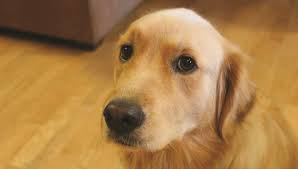

In [ ]:
img

In [ ]:
img_t = preprocess(img)

Ahora debemos remodelar, recortar y normalizar el tensor de entrada de manera que la red espera.

In [ ]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

Ahora correremos el nuevo data en el modelo ya entrenado (inference) para esto debemos poner la red en modo *eval*


In [ ]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Si nos olvidamos de hacer eso, algunos modelos previamente entrenados, el *batch normalization* y el *dropout*,
no producirán respuestas significativas, solo por la forma en que funcionan internamente.
Ahora que se ha configurado la evaluación, estamos listos para la inferencia:

In [ ]:
out = resnet(batch_t)
out

tensor([[-1.3986e+00, -6.2033e-01, -2.9437e+00, -2.7712e+00, -3.7103e+00,
          5.2921e-01, -2.5447e+00, -3.3349e+00, -1.7430e+00, -3.6172e+00,
         -4.6292e-01, -1.7834e+00, -2.7132e+00, -3.3856e+00, -2.9248e+00,
         -2.9830e+00, -3.6641e+00, -2.1183e+00, -2.2839e+00, -1.7682e+00,
         -2.7717e+00, -3.2199e+00, -2.8673e+00, -1.6995e+00, -2.4627e+00,
         -1.2556e+00, -1.8867e+00, -1.8260e+00, -2.0010e+00, -2.0818e+00,
         -3.5218e+00, -2.2841e+00, -4.1108e-01, -1.3036e+00, -1.5079e+00,
         -2.6547e+00, -2.0323e-01, -2.0098e+00, -8.3036e-01, -2.6095e+00,
         -1.2450e+00, -5.2958e-01,  7.2256e-01,  6.3277e-01, -2.3049e+00,
         -1.5677e+00, -1.0123e+00, -8.1403e-01, -3.0311e+00, -3.6857e+00,
         -4.1956e+00, -9.1304e-01, -2.1229e+00, -2.7010e+00, -2.6808e+00,
         -3.1066e+00, -2.1794e+00, -2.6784e+00, -4.0254e+00, -2.8773e-01,
         -1.3773e+00, -2.2222e+00, -5.0211e-01, -6.3197e-01, -1.7300e+00,
         -1.9016e+00, -1.0187e+00, -2.

Esta operación contuvo 44.5 millones de parametros, produciendo un vector de 1000 puntuaciones, uno por clase.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()
  

Saving imagenet1000.txt to imagenet1000 (1).txt


{'imagenet1000.txt': b'{0: \'tench, Tinca tinca\',\n 1: \'goldfish, Carassius auratus\',\n 2: \'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\',\n 3: \'tiger shark, Galeocerdo cuvieri\',\n 4: \'hammerhead, hammerhead shark\',\n 5: \'electric ray, crampfish, numbfish, torpedo\',\n 6: \'stingray\',\n 7: \'cock\',\n 8: \'hen\',\n 9: \'ostrich, Struthio camelus\',\n 10: \'brambling, Fringilla montifringilla\',\n 11: \'goldfinch, Carduelis carduelis\',\n 12: \'house finch, linnet, Carpodacus mexicanus\',\n 13: \'junco, snowbird\',\n 14: \'indigo bunting, indigo finch, indigo bird, Passerina cyanea\',\n 15: \'robin, American robin, Turdus migratorius\',\n 16: \'bulbul\',\n 17: \'jay\',\n 18: \'magpie\',\n 19: \'chickadee\',\n 20: \'water ouzel, dipper\',\n 21: \'kite\',\n 22: \'bald eagle, American eagle, Haliaeetus leucocephalus\',\n 23: \'vulture\',\n 24: \'great grey owl, great gray owl, Strix nebulosa\',\n 25: \'European fire salamander, Salamandra s

In [ ]:
file_name = "imagenet1000.txt"
labels = [line.strip() for line in file_name.readlines()]

AttributeError: ignored

##**Bibliografia**
[1]Deep Learning with PyTorch, Eli Stevens,Luca Atiaga,Thomas Viehman.
[2]https://github.com/pytorch/vision